# Import

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset

In [3]:
df = pd.read_csv(r'cleveland.csv')
df.columns =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df['target'] = list(map(lambda x : 1 if x != 0 else 0, df['target']))
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


### Plot Distribution of target and age

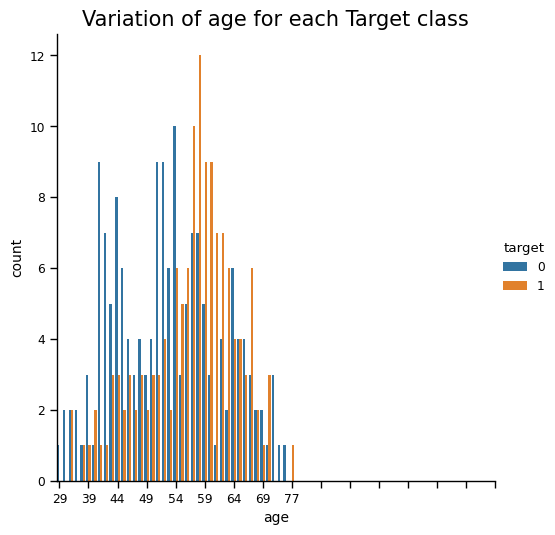

In [4]:
sns.set_context('paper',
                font_scale=1,
                rc={
                    "font.size":3,
                    "axes.titlesize":15,
                    "axes.labelsize":10,
                })

ax = sns.catplot(kind='count',
                 data=df,
                 x='age',
                 hue='target',
                 order=df.age.sort_values().unique())

ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of age for each Target class')
plt.show()

### Plot Distribution of age and sex with the target

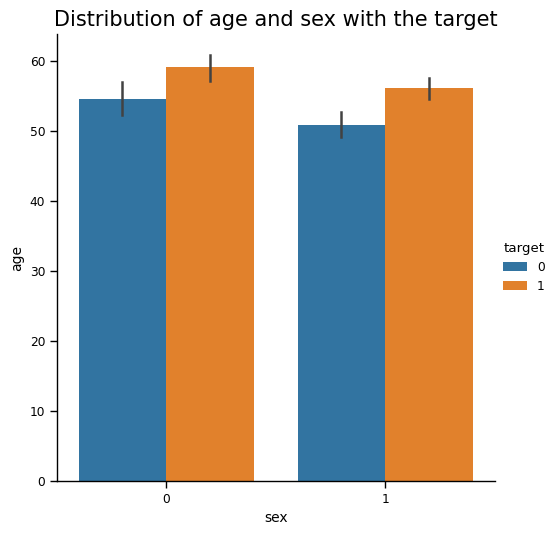

In [5]:
sns.set_context('paper',
                font_scale=1,
                rc={
                    "font.size":3,
                    "axes.titlesize":15,
                    "axes.labelsize":10,
                })

sns.catplot(kind='bar',
                 data=df,
                 x='sex',
                 y='age',
                 hue='target')
plt.title('Distribution of age and sex with the target')
plt.show()

### KNN 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, model.predict(X_train))

print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.61


### SVM

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [8]:
X = df . iloc [: , : -1]. values
y = df . iloc [: , -1]. values

X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

classifier = GaussianNB ()
classifier.fit(X_train , y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test , y_pred)
cm_train = confusion_matrix(y_train , classifier.predict(X_train))

print()
accuracy_for_test = np.round((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))



Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.85


### Decision Tree

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10,
                                    min_samples_split=2,
                                    random_state=42,
                                    ccp_alpha=0.0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.77


### Random Forest

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(criterion='gini',
                                    max_depth=10,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features='sqrt',
                                    random_state=42,
                                    n_estimators=10)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.99
Accuracy for test set for RandomForestClassifier = 0.77


### AdaBoost

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = AdaBoostClassifier(n_estimators=50,
                                learning_rate=1.0,
                                random_state=42,)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.9
Accuracy for test set for AdaBoostClassifier = 0.84


### Gradient Boosting

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier(learning_rate=0.1, 
                                        n_estimators=100,
                                        subsample=1.0,
                                        min_samples_split=2,
                                        max_depth=3,
                                        random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoostingClassifier = 0.99
Accuracy for test set for GradientBoostingClassifier = 0.82


### XGBoost

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg = XGBClassifier(objective='binary:logistic',
                   random_state=42,
                   n_estimators=100)

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, xg.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


### SVM ver2

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))


Accuracy for training set for SVC = 0.67
Accuracy for test set for SVC = 0.67


### Stacking-Based

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf',random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [('dtc', dtc),
       ('rfc', rfc),
       ('knn', knn),
       ('gc', gc),
       ('ad', ad),
       ('svc', svc),]

xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test) ,2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))

c:\ProgramData\miniforge3\envs\AIO\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



Accuracy for training set for SVC = 0.9
Accuracy for test set for SVC = 0.79


### Decission Tree: Important Features

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import datasets

C:\Users\Admin\AppData\Local\Temp\ipykernel_5304\1239808936.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_feature_names, palette='viridis')


<Axes: >

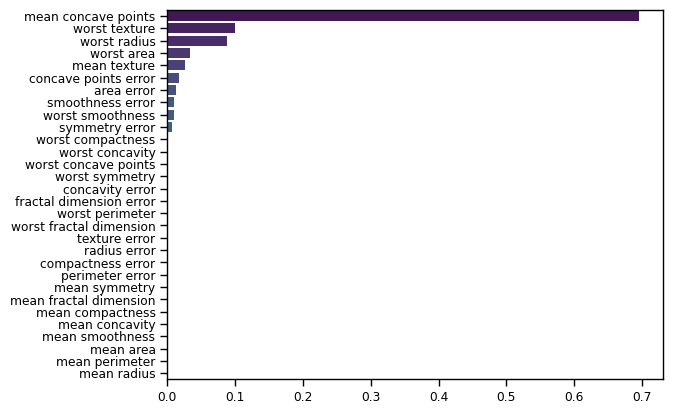

In [31]:
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

features_importances = clf.feature_importances_

sorted_indices = np.argsort(features_importances)[::-1]
sorted_feature_names = cancer.feature_names[sorted_indices]
sorted_importances = features_importances[sorted_indices]

sns.set_context(rc={'figure.figsize':(11.7, 8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette='viridis')